In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import dataframe_image as dfi
sns.set(style="darkgrid")

In [2]:
dfab=pd.read_csv("abtest.csv")   #saves the csv file as a dataframe named dfab
dfab

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
0,546592,control,old,3.48,no,Spanish
1,546468,treatment,new,7.13,yes,English
2,546462,treatment,new,4.40,no,Spanish
3,546567,control,old,3.02,no,French
4,546459,treatment,new,4.75,yes,Spanish
...,...,...,...,...,...,...
95,546446,treatment,new,5.15,no,Spanish
96,546544,control,old,6.52,yes,English
97,546472,treatment,new,7.07,yes,Spanish
98,546481,treatment,new,6.20,yes,Spanish


In [3]:
dfab.info()   # shows the information of the dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   user_id                 100 non-null    int64  
 1   group                   100 non-null    object 
 2   landing_page            100 non-null    object 
 3   time_spent_on_the_page  100 non-null    float64
 4   converted               100 non-null    object 
 5   language_preferred      100 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 4.8+ KB


### Insight
    
    There are 100 rows of data. There are no null values. There are only two columns that are numerical, time_spent_on_the_page and user_id. It seems that user_id is not going to be used for numerical calculations.

In [4]:
dfab.describe()   # Describes the numerical operations of the dfab dataframe

,user_id,time_spent_on_the_page
count,100.000000,100.000000
mean,546517.000000,5.377800
std,52.295779,2.378166
min,546443.000000,0.190000
25%,546467.750000,3.880000
50%,546492.500000,5.415000
75%,546567.250000,7.022500
max,546592.000000,10.710000


### Insight

    It seems that the time_spent_on_the_page is normally distributed.

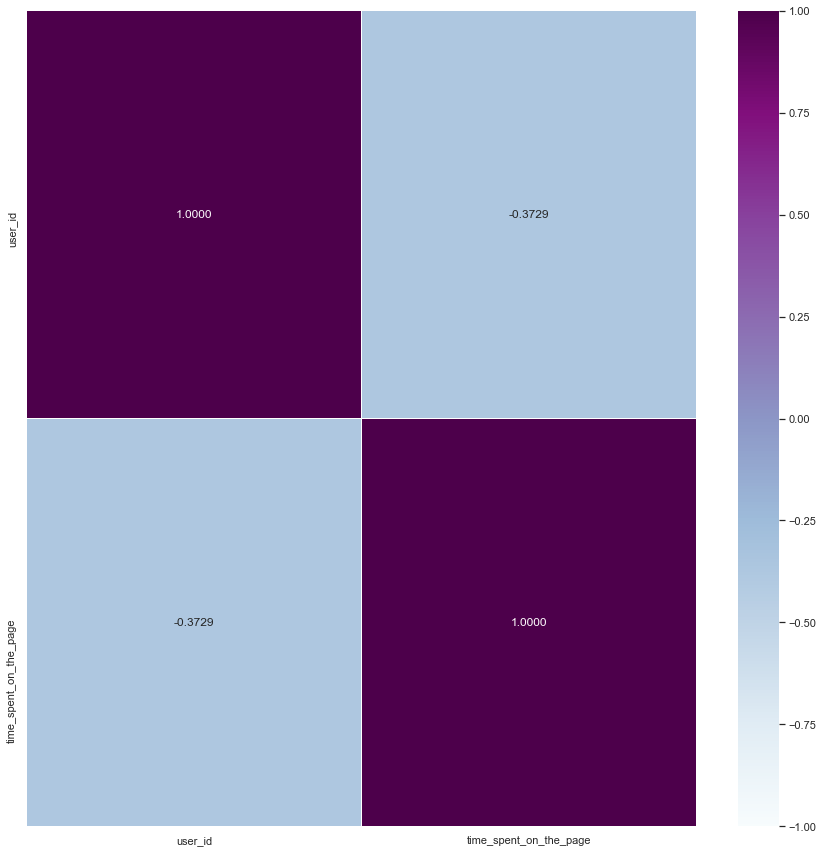

<Figure size 432x288 with 0 Axes>

In [5]:
# returns a correlation heatmap plot
plt.figure(figsize=(15,15))
sns.heatmap(dfab.corr(), annot=True,vmin=-1, vmax=1, linewidths=0.1, fmt= '.4f',cmap="BuPu")
plt.show()
plt.savefig("correlation_plot.jpg", bbox_inches='tight')   # saves plot as JPEG

### Insight

    There seems to be no correlation between user_id and time_spent_on_the_page.

In [6]:
# This function returns the boxplots and histograms for a particular attribute.

def hist_box_combined(data, attribute, figsize=(12, 7), kde=True, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    attribute: dataframe attribute/column
    figsize: size of figure (default (12,7))
    kde: whether to show the density curve or not (default True)
    bins: number of bins for histogram (default None)
    """
    f, (box, hist) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    
    # boxplot will be created and a star will indicate the mean value of the column
    sns.boxplot(data=data, x=attribute, ax=box, showmeans=True, color="coral")
    
    # For histogram
    sns.histplot(data=data, x=attribute, kde=kde, ax=hist, color="slateblue")
    
    # Add mean to the histogram
    hist.axvline(data[attribute].mean(), color="darkgreen", linestyle="--")
    
    # Add median to the histogram
    hist.axvline(data[attribute].median(), color="black", linestyle="-")

# User ID

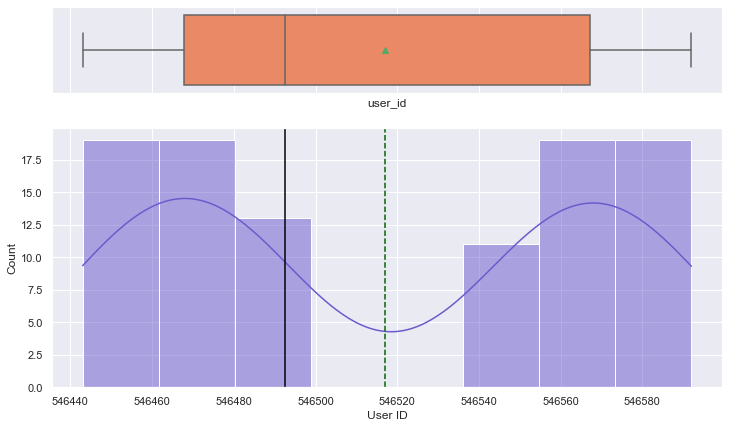

In [7]:
# histogram and boxplot of the user_id column
hist_box_combined(dfab, "user_id")
plt.xlabel("User ID")   # sets x label
plt.savefig("hist_box_user_id.jpg", bbox_inches='tight')   # saves plot as JPEG

### Insight

    There seems to be no viable relationship in the user_id data.

In [8]:
def bar_count(data, x_attribute, y_attribute, hue=None, figsize=(12, 7), kde=True, bins=None):
    # barplot graph showing total amount at top of column
    plt.figure(figsize=figsize)   #size of the graph

    ax=sns.barplot(data=data, y=y_attribute, x=x_attribute, hue=hue, palette="deep", ci=None)   #creat barplot and color scheme

    # creating labeling annotation as well as position for each bar
    for p in ax.patches:
        label="{:.2f} min".format(p.get_height())   # label format and value
        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

    #     label postion
        ax.annotate(
                label,
                (x, y),
                ha="center",
                va="center",
                size=25,
                xytext=(0, -15),
                textcoords="offset points",
            )

In [9]:
 def count_anottated(data, x_feature, hue=None):
    plt.figure(figsize=(15, 7))   #size of the graph

    ax=sns.countplot(data=data, x=x_feature, hue=hue, palette="deep")   #create countplot and color scheme

    # creating labeling annotation as well as position for each bar
    for p in ax.patches:
        label="{:.0f}".format(p.get_height())   # label format and value
        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

    #     label postion
        ax.annotate(
                label,
                (x, y),
                ha="center",
                va="center",
                size=50,
                xytext=(0, -25),
                textcoords="offset points",
            )

# Group

treatment    50
control      50
Name: group, dtype: int64


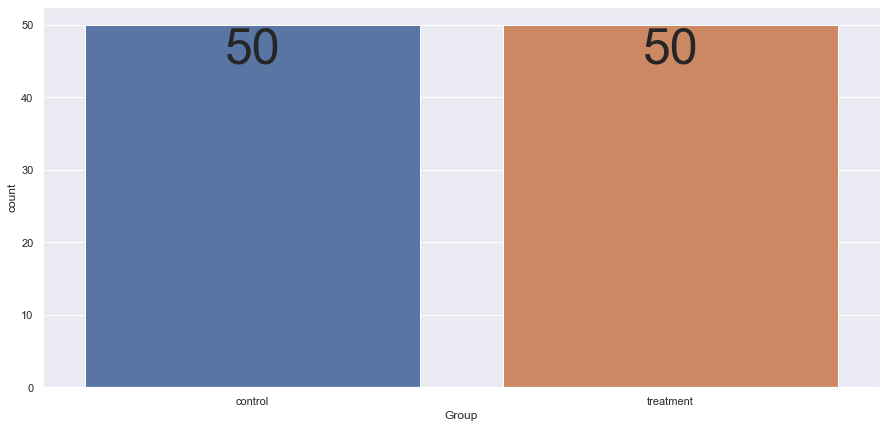

In [10]:
print(dfab.group.value_counts())
# countplot of the group column
count_anottated(data=dfab, x_feature="group")
plt.xlabel("Group")   # sets x label
plt.savefig("count_plot_group.jpg", bbox_inches='tight')   # saves plot as JPEG

### Insight

    The data is split even between the two control groups, as 50 are in treatment group, and 50 are in control group.

# Landing Page

new    50
old    50
Name: landing_page, dtype: int64


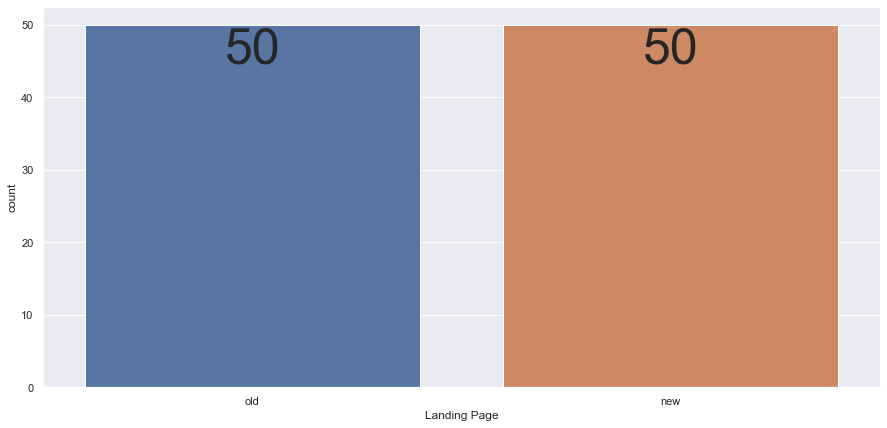

In [11]:
print(dfab.landing_page.value_counts())
# countplot of the group column
count_anottated(data=dfab, x_feature="landing_page")
plt.xlabel("Landing Page")   # sets x label
plt.savefig("count_plot_landing_page.jpg", bbox_inches='tight')   # saves plot as JPEG

In [12]:
# shows the seperation of the data by both the landing page column and the group column
dfab_group_landing_page=dfab.groupby("landing_page").group.value_counts()
dfab_group_landing_page

landing_page  group    
new           treatment    50
old           control      50
Name: group, dtype: int64

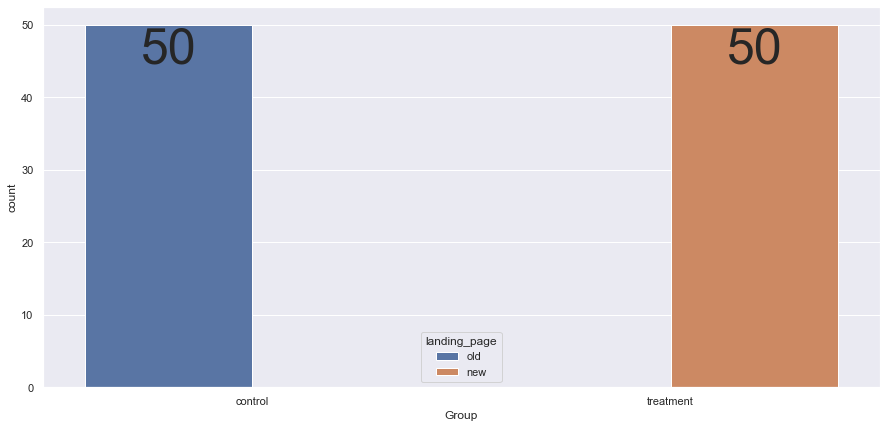

In [13]:
# countplot showing the seperation of the data by both the landing page column and the group column
plt.figure(figsize=(15, 7))   #size of the graph

ax=sns.countplot(data=dfab, x="group", hue="landing_page",
                 palette="deep")   #creat coutnplot and color scheme

# creating labeling annotation as well as position for each bar
for p in ax.patches:
    label="{:.0f}".format(p.get_height())   # label format and value
    x = p.get_x() + p.get_width() / 2  # width of the plot
    y = p.get_height()  # height of the plot

#     label postion
    ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=50,
            xytext=(0, -25),
            textcoords="offset points",
        )
plt.xlabel("Group")   # sets x label
plt.savefig("Group_vs_Landing_Page.jpg", bbox_inches='tight')   # saves plot as JPEG

### Insight

    The data is split evenly between the two landing pages as well. Additionaly, the new landing page is the same exact group of people as the treatment group. The old landing_page are also completely filled with the control group. Thus, it would help clean up the data by dropping one of the "group" or "landing+page" columns.

# Time Spent on the Page

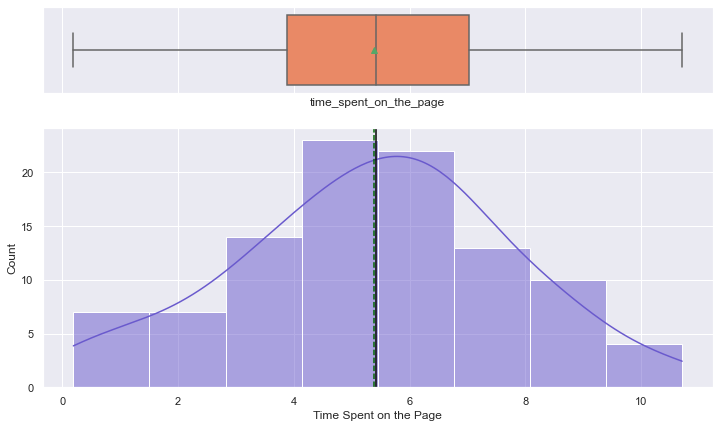

In [14]:
# histogram and boxplot of the user_id column
hist_box_combined(dfab, "time_spent_on_the_page")
plt.xlabel("Time Spent on the Page")   # sets x label
plt.savefig("hist_box_time_spent_on_the_page.jpg", bbox_inches='tight')   # saves plot as JPEG

### Insight

    The data for time_spent_on_the_page is normally distributed.

# Converted

yes    54
no     46
Name: converted, dtype: int64


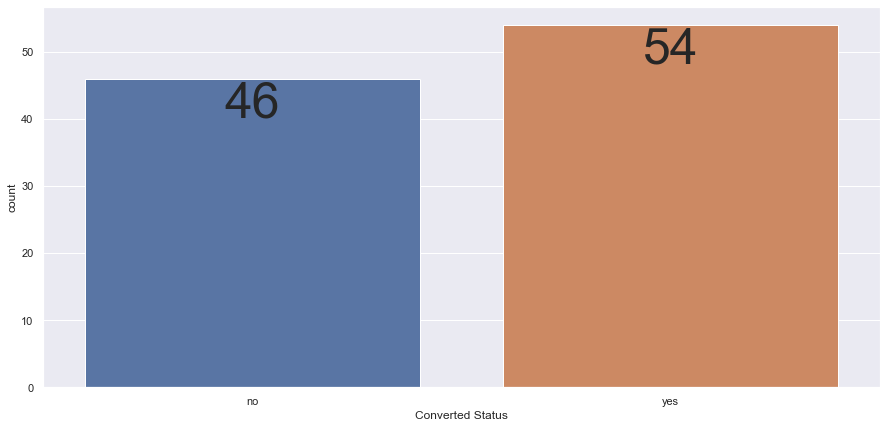

In [15]:
print(dfab.converted.value_counts())
# countplot of the converted column
count_anottated(data=dfab, x_feature="converted")
plt.xlabel("Converted Status")   # sets x label
plt.savefig("count_plot_converted.jpg", bbox_inches='tight')   # saves plot as JPEG

### Insight

    The groups are not split 50/50, suggesting that the converted does not equal the exact group sizes.

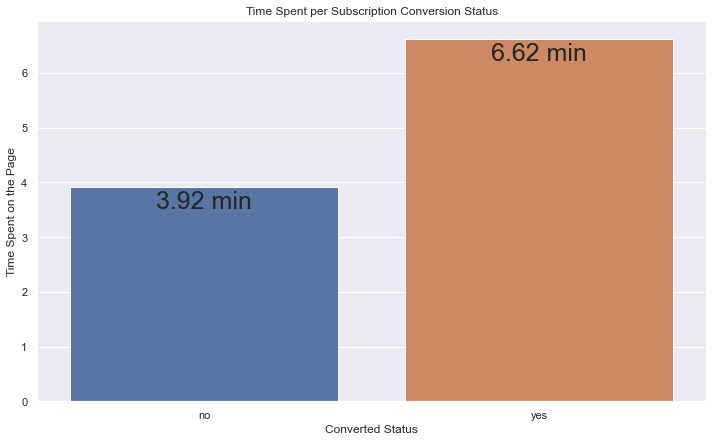

In [16]:
# barplot of the converted column with respect to mean time spent on the page
bar_count(data=dfab, x_attribute="converted", y_attribute="time_spent_on_the_page")

plt.title("Time Spent per Subscription Conversion Status")   # sets title
plt.xlabel("Converted Status")   # sets x label
plt.ylabel("Time Spent on the Page")   # sets y label
plt.savefig("Time_spent_per_converted_status.jpg", bbox_inches='tight')   # save graph as JPEG
plt.show()

### Insight

    On average a person that changes there subsciption status to yes spends almost 3 more minutes on the sight then a person whos subsription status is no. Thus, to increase number of subsriptions we can say we should increase average time spent on the page.Thus, the new page leads to more subscriptions as supported in the above plot.

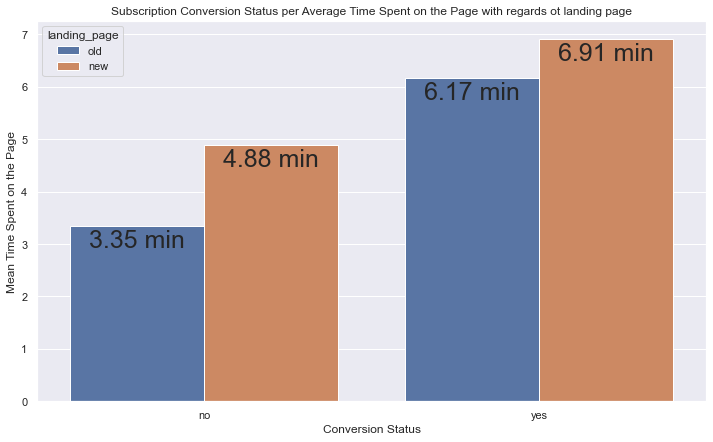

In [17]:
# barplot of the converted column with respect to mean time spent on the page and landing page
dfab[["time_spent_on_the_page", "converted", "landing_page"]]
bar_count(data=dfab[["time_spent_on_the_page", "converted", "landing_page"]], x_attribute="converted", y_attribute="time_spent_on_the_page", hue="landing_page")

plt.title("Subscription Conversion Status per Average Time Spent on the Page with regards ot landing page")   # sets title
plt.xlabel("Conversion Status")   # sets x label
plt.ylabel("Mean Time Spent on the Page")   # sets y label
plt.savefig("Converted_vs_Time_Spent_on_the_PAge_vs_Landing_Page.jpg", bbox_inches='tight')   # save graph as JPEG
plt.show()

# Language Preferred

Spanish    34
French     34
English    32
Name: language_preferred, dtype: int64


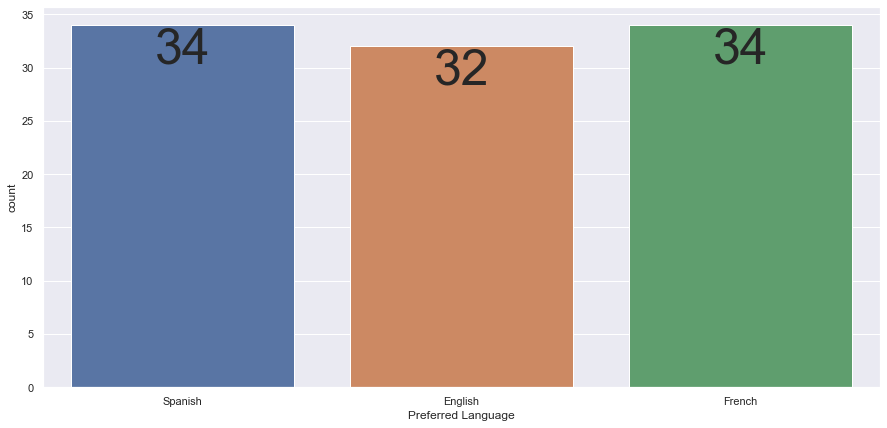

In [18]:
print(dfab.language_preferred.value_counts())
# countplot of the language preference column
count_anottated(data=dfab, x_feature="language_preferred")
plt.xlabel("Preferred Language")   # sets x label
plt.savefig("count_plot_language_preferred.jpg", bbox_inches='tight')   # save graph as JPEG

### Insight

    Language groups are seperated almost evenly. This means there is good diversity in the data.

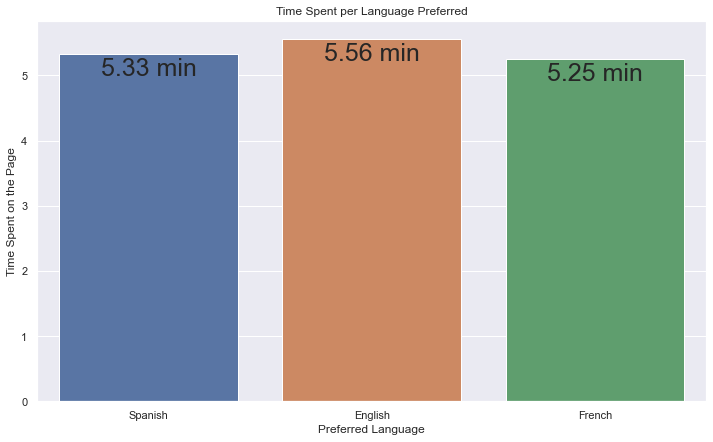

In [19]:
# barplot of the preferred language column with respect to mean time spent on the page
bar_count(data=dfab, x_attribute="language_preferred", y_attribute="time_spent_on_the_page")

plt.title("Time Spent per Language Preferred")   # sets title
plt.xlabel("Preferred Language")   # sets x label
plt.ylabel("Time Spent on the Page")   # sets y label
plt.savefig("Time_spent_per_language_preferred.jpg", bbox_inches='tight')   # save graph as JPEG
plt.show()

### Insight

    The groups are very similar, suggesting that there is no change in time spent on teh page in regards to language preference.

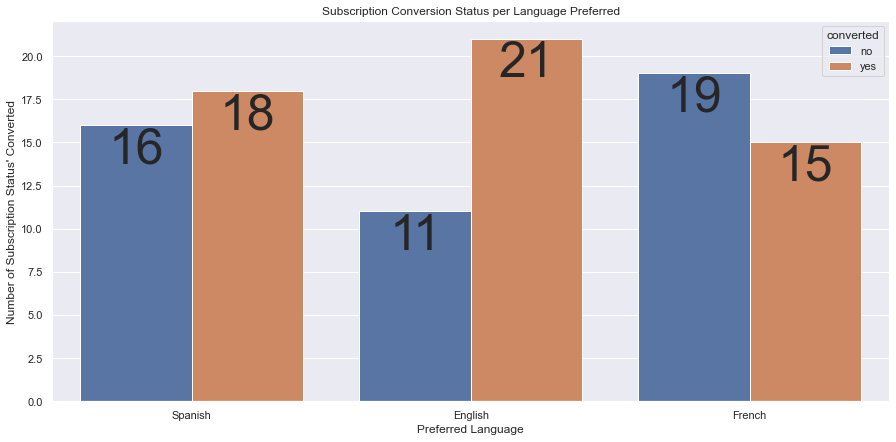

In [20]:
dfab[["converted", "language_preferred"]]
# countplot of the preferred language column with respect to number of converted subscription status' and converted status
count_anottated(data=dfab[["converted", "language_preferred"]], x_feature="language_preferred", hue="converted")

plt.title("Subscription Conversion Status per Language Preferred")   # sets title
plt.xlabel("Preferred Language")   # sets x label
plt.ylabel("Number of Subscription Status' Converted")   # sets y label
plt.savefig("Converted_vs_Language_Preferred.jpg", bbox_inches='tight')   # save graph as JPEG
plt.show()

### Insight

    There is a higher amount of subscription status' converted to yes in Spanish and English then compared to no. In French there is a higher number of subscription status' converted to no than to yes. Thus, targeted English and Spanish speaking people would be better than French. English is the highest rate by far. Thus, targeting English first would be the best outcome.

# Question 2: What landing page did users spend more time on?

### Insight

    On average, people stay on the new page about 2 minutes longer than the old page.

In [21]:
mu_new=dfab["time_spent_on_the_page"][dfab["landing_page"]=="new"].mean()   # finds mean time spent on new landing page
mu_old=dfab["time_spent_on_the_page"][dfab["landing_page"]=="old"].mean()   # finds mean time spent on old landing page
sigma_new=dfab["time_spent_on_the_page"][dfab["landing_page"]=="new"].std()   # finds standard deviation of time spent on new landing page
sigma_old=dfab["time_spent_on_the_page"][dfab["landing_page"]=="old"].std()   # finds standard deviation of time spent on old landing page

print("The mean for the new page is", mu_new)
print("The mean for the old page is", mu_old)
print("The standard deviation for the new page is",sigma_new)
print("The standard deviation for the old page is",sigma_old)

The mean for the new page is 6.2232
The mean for the old page is 4.532400000000001
The standard deviation for the new page is 1.8170310387878263
The standard deviation for the old page is 2.581974849306046


### Insight
    
    Seeing that the standard deviations are different and not given, we can use the two independent sample T-test for equality of means - unequal standard deviations test to answer the question with a 0.05 level of confidence.

Let $\mu_1, \mu_2$ be the mean time spent on the page of **New** and **Old** landing page groups respectively.

We will test the null hypothesis

>$H_0:\mu_1=\mu_2$

against the alternate hypothesis

>$H_a:\mu_1>\mu_2$

In [22]:
from scipy.stats import ttest_ind

# find the p-value
test_stat, p_value = ttest_ind(dfab["time_spent_on_the_page"][dfab["landing_page"]=="new"], dfab["time_spent_on_the_page"][dfab["landing_page"]=="old"], equal_var = False, alternative = 'greater')
print('The p-value is ', p_value)

The p-value is  0.0001392381225166549


### Insight

    The p-value is below the 0.05 level of significance. Thus, the null hypothesis can be rejected, proving that people spend mroe time on the new landing page than on the old.

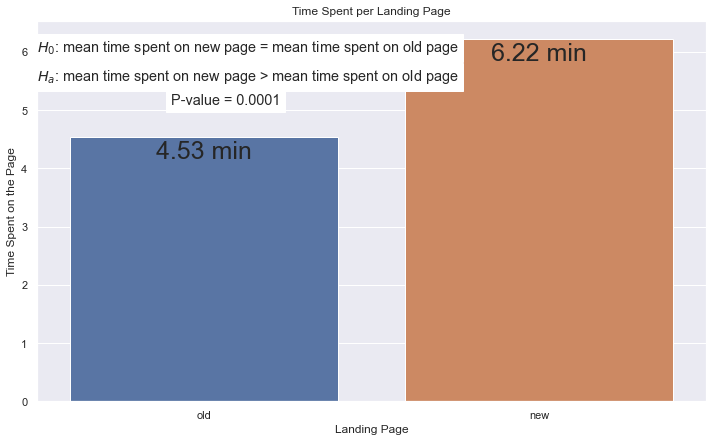

In [23]:
# barplot of the landing page column with respect to mean time spent on the page
bar_count(data=dfab, x_attribute="landing_page", y_attribute="time_spent_on_the_page")

plt.title("Time Spent per Landing Page")   # sets title
plt.xlabel("Landing Page")   # sets x label
plt.ylabel("Time Spent on the Page")   # sets y label

# adds text box for null hypothesis, alternative hypothesis, and p-value
plt.text(x=-0.5, y=6, s="$H_0$: mean time spent on new page = mean time spent on old page", backgroundcolor="white", fontsize="large")
plt.text(x=-0.5, y=5.5, s="$H_a$: mean time spent on new page > mean time spent on old page", backgroundcolor="white", fontsize="large")
plt.text(x=-0.1, y=5.1, s="P-value = {:.4f}".format(p_value), backgroundcolor="white", fontsize="large")
plt.savefig("Time_spent_per_landing_page_w_p_value.jpg", bbox_inches='tight')   # save graph as JPEG
plt.show()

# Question 3: Conversion rate for the new page is greater than the conversion rate for the old page?

Null hypothesis:

>$H_0:$ conversion rate on new page = conversion rate on old page.

Alternate hypothesis:

>$H_a:$ conversion rate on new page > conversion rate on old page.

In [24]:
# shows distribution of users by landing page and subscription conversion status
dfab_convert_count=dfab.groupby("landing_page").converted.value_counts()
dfab_convert_count

landing_page  converted
new           yes          33
              no           17
old           no           29
              yes          21
Name: converted, dtype: int64

### Let's test whether the Z-test assumptions are satisfied or not

*   Binomally distributed population - Yes, a person either converted or not.
*   Random sampling from the population - Yes, we randomly selected 100 users and divided them equally.  
*   Can the binomial distribution approximated to normal distribution - Yes. For binary data, CLT works slower than usual. The standard thing is to check whether np and n(1-p) are greater than or equal to 10. Here, n and p refer to the sample size and sample proportion respectively.
>$np_1 = 50\cdot \frac{33}{50} =33 \geq 10\\
n(1-p_1) = 50 \cdot \frac{50-33}{50} =17 \geq 10 \\
np_2 = 50\cdot \frac{21}{50} =21 \geq 10\\
n(1-p_2) = 50 \cdot \frac{50-21}{50} =29 \geq 10 $


In [25]:
from statsmodels.stats.proportion import proportions_ztest

# set the counts of defective items
defect_count = np.array([33, 21])

# set the sample sizes
nobs = np.array([50, 50])

# find the p-value
test_stat, p_value = proportions_ztest(defect_count, nobs, alternative="larger")
print('The p-value is ' + str(p_value))

The p-value is 0.008026308204056278


### Insight

    The probablity for conversion is greater on the new page than on the old page, due to the p-value being below the level of significance (0.05).

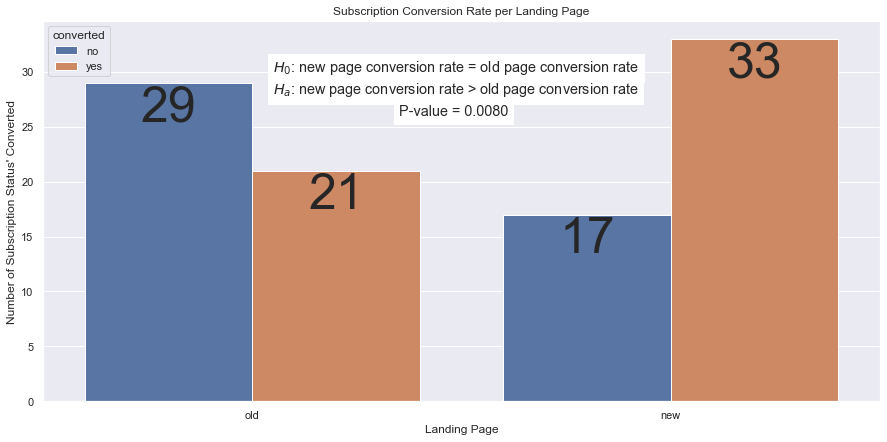

In [26]:
# countplot of the landing page column with respect to number of converted subscription status' and converted status
count_anottated(data=dfab[["converted", "landing_page"]], x_feature="landing_page", hue="converted")

plt.title("Subscription Conversion Rate per Landing Page")   # sets title
plt.xlabel("Landing Page")   # set x label
plt.ylabel("Number of Subscription Status' Converted")   # sets y label

# adds text box for null hypothesis, alternative hypothesis, and p-value
plt.text(x=0.05, y=30, s="$H_0$: new page conversion rate = old page conversion rate", backgroundcolor="white", fontsize="large")
plt.text(x=0.05, y=28, s="$H_a$: new page conversion rate > old page conversion rate", backgroundcolor="white", fontsize="large")
plt.text(x=0.35, y=26, s="P-value = {:.4f}".format(p_value), backgroundcolor="white", fontsize="large")
plt.savefig("Conversion_Rate_per_Landing_Page_w_p_value.jpg", bbox_inches='tight')   # save graph as JPEG
plt.show()

# Question 4: Does the converted status depend on the preferred language?

Null hypothesis:

>$H_0:$ Language preference is independent of converted status.

Alternate hypothesis:

>$H_a:$ Language preference depends on converted status.

In [27]:
#check to see if number of sample observations in each level of the variable is at least 5
dfab[["converted", "language_preferred"]].value_counts()

converted  language_preferred
yes        English               21
no         French                19
yes        Spanish               18
no         Spanish               16
yes        French                15
no         English               11
dtype: int64

### Let's test whether the assumptions are satisfied or not

* Categorical variables - Yes
* Expected value of the number of sample observations in each level of the variable is at least 5 - Yes, the number of observations in each level is greater than 5.
* Random sampling from the population - Yes, we are informed that the collected sample is a simple random sample.


In [28]:
# creates a crosstab for subscription conversion status and language preferred
df_language_preferred_converted=pd.crosstab(index=dfab["converted"], columns=dfab["language_preferred"])
df_language_preferred_converted

language_preferred,English,French,Spanish
converted,,,
no,11,19,16
yes,21,15,18


In [29]:
from scipy.stats import chi2_contingency

# df_language_preferred_converted.value_counts().drop("converted", axis=1)
chi, p_value, dof, expected = chi2_contingency(df_language_preferred_converted)
print("The p-value is", p_value)

The p-value is 0.21298887487543447


### Insight

    The p-value is over the significance level of 0.05. Thus, the language preference is independant of the conversion status.

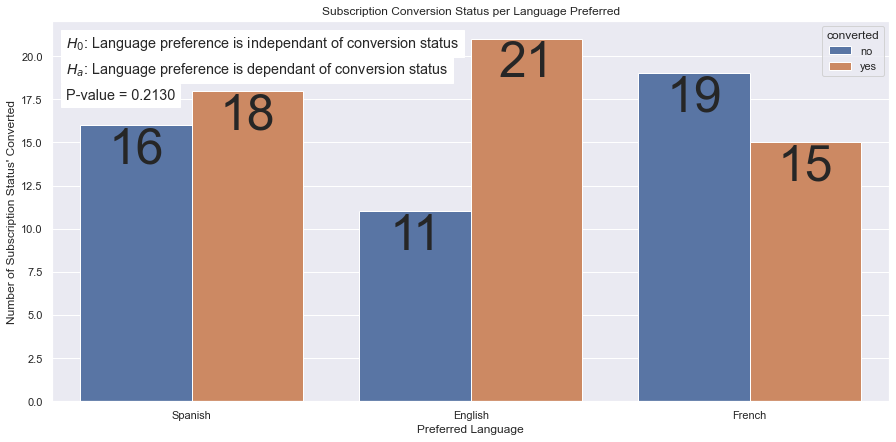

In [30]:
# countplot of the preferred language column with respect to number of converted subscription status' and converted status
count_anottated(data=dfab[["converted", "language_preferred"]], x_feature="language_preferred", hue="converted")

plt.title("Subscription Conversion Status per Language Preferred")   # sets title
plt.xlabel("Preferred Language")   # sets x label
plt.ylabel("Number of Subscription Status' Converted")   # sets y label

# adds text box for null hypothesis, alternative hypothesis, and p-value
plt.text(x=-0.45, y=20.5, s="$H_0$: Language preference is independant of conversion status", backgroundcolor="white", fontsize="large")
plt.text(x=-0.45, y=19, s="$H_a$: Language preference is dependant of conversion status", backgroundcolor="white", fontsize="large")
plt.text(x=-0.45, y=17.5, s="P-value = {:.4f}".format(p_value), backgroundcolor="white", fontsize="large")

plt.savefig("Converted_vs_Language_Preferred_w_p_value.jpg", bbox_inches='tight')   # save graph as JPEG
plt.show()

# Question 5: Is the mean time spent on the new page the same for different language users?

Let $\mu_1, \mu_2, \mu_3$ be the means of time spent on the page for different languages English, French,  and Spanish respectively.

We will test the null hypothesis

>$H_0: \mu_1 = \mu_2 = \mu_3$

against the alternative hypothesis

>$H_a: $ At least one mean time spent on the page is different from the rest.

language_preferred
English    6.663750
French     6.196471
Spanish    5.835294
Name: time_spent_on_the_page, dtype: float64


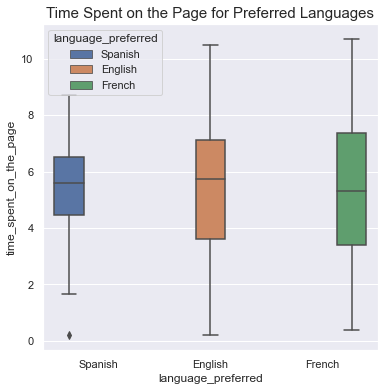

In [31]:
dfab_time_on_new_page_per_language=dfab[["landing_page", "language_preferred", "time_spent_on_the_page"]]
# shows mean time spent on the new landing page with respect to language preferred
dfab_time_on_new_page_per_language=dfab_time_on_new_page_per_language[dfab_time_on_new_page_per_language["landing_page"]=="new"]
print(dfab_time_on_new_page_per_language.groupby("language_preferred").time_spent_on_the_page.mean())

# boxplot for visualization 
fig, ax = plt.subplots(figsize = (6,6))
a = sns.boxplot(x= "language_preferred", y = 'time_spent_on_the_page' , data = dfab, hue = 'language_preferred')
a.set_title("Time Spent on the Page for Preferred Languages", fontsize=15)
# a.set_legend()
plt.show()

### Shapiro-Wilk’s test

We will test the null hypothesis

>$H_0:$ Time spent on the page follows a normal distribution

against the alternative hypothesis

>$H_a:$ Time spent on the page does not follow a normal distribution

In [32]:
from scipy.stats import shapiro

#  shapiro test producing p-value to see if the page follows a normal distribution
w, p_value = stats.shapiro(dfab['time_spent_on_the_page']) 
print('The p-value is', p_value)

The p-value is 0.5643684267997742


### Insight
    Since p-value of the test is very large, we fail to reject the null hypothesis that the response follows the normal distribution.

### Levene’s test

We will test the null hypothesis

>$H_0$: All the population variances are equal

against the alternative hypothesis

>$H_a$: At least one variance is different from the rest

In [33]:
from scipy.stats import levene

#  levene test producing p-value to see if population variances are equal
statistic, p_value = levene( dfab["time_spent_on_the_page"][dfab["language_preferred"]=="English"][dfab["landing_page"]=="new"], 
                                   dfab["time_spent_on_the_page"][dfab["language_preferred"]=="French"][dfab["landing_page"]=="new"], 
                                   dfab["time_spent_on_the_page"][dfab["language_preferred"]=="Spanish"][dfab["landing_page"]=="new"])
# find the p-value
print('The p-value is', p_value)

The p-value is 0.46711357711340173


### Insight
    Since p-value of the test is very large, we fail to reject the null hypothesis of homogeneity of variances.

In [34]:
from scipy.stats import f_oneway

#  f_oneway test producing p-value to show if the mean time per language preferred are all equal
statistic, p_value = f_oneway( dfab["time_spent_on_the_page"][dfab["language_preferred"]=="English"][dfab["landing_page"]=="new"], 
                                   dfab["time_spent_on_the_page"][dfab["language_preferred"]=="French"][dfab["landing_page"]=="new"], 
                                   dfab["time_spent_on_the_page"][dfab["language_preferred"]=="Spanish"][dfab["landing_page"]=="new"])
# find the p-value
print('The p-value is', p_value)

The p-value is 0.43204138694325955


### Insight

    As the p-value is much more than the significance level, we can not reject the null hypothesis. Hence, we do not have enough statistical significance to conclude that  at least one time spent on the page is different from the rest at 5% significance level.

In [35]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# perform multiple pairwise comparison (Tukey HSD) to show p-value for individual preferred language relationships for equal means
m_comp = pairwise_tukeyhsd(endog = dfab_time_on_new_page_per_language['time_spent_on_the_page'], groups = dfab_time_on_new_page_per_language['language_preferred'], alpha = 0.05)
print(m_comp)

 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
 group1  group2 meandiff p-adj   lower  upper  reject
-----------------------------------------------------
English  French  -0.4673 0.7259 -2.0035  1.069  False
English Spanish  -0.8285  0.401 -2.3647 0.7078  False
 French Spanish  -0.3612  0.816  -1.874 1.1516  False
-----------------------------------------------------


### Insight

As the p-values (refer to the p-adj column) for comparing the mean time spent on the page are all greater than the significance level, the null hypothesis of equality of all population means can not be rejected.

Thus, we can say that the mean time spent on the page for the preferred language of Spanish, English, and French are all similar

<Figure size 1080x504 with 0 Axes>

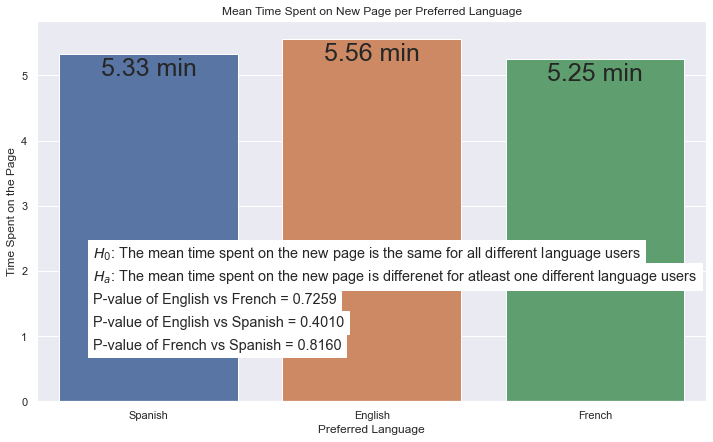

In [36]:
plt.figure(figsize=(15,7))
# barplot of the preferred language column with respect to mean time spent on the page
bar_count(data=dfab, x_attribute="language_preferred", y_attribute="time_spent_on_the_page")

plt.title("Mean Time Spent on New Page per Preferred Language")   # sets title
plt.xlabel("Preferred Language")   # sets x label
plt.ylabel("Time Spent on the Page")   # sets y label

# adds text box for null hypothesis, alternative hypothesis, and p-value
plt.text(x=-0.25, y=2.2, s="$H_0$: The mean time spent on the new page is the same for all different language users", backgroundcolor="white", fontsize="large")
plt.text(x=-0.25, y=1.85, s="$H_a$: The mean time spent on the new page is differenet for atleast one different language users", backgroundcolor="white", fontsize="large")
plt.text(x=-.25, y=1.5, s="P-value of English vs French = 0.7259", backgroundcolor="white", fontsize="large")
plt.text(x=-.25, y=1.15, s="P-value of English vs Spanish = 0.4010", backgroundcolor="white", fontsize="large")
plt.text(x=-.25, y=0.8, s="P-value of French vs Spanish = 0.8160", backgroundcolor="white", fontsize="large")

plt.savefig("Time_spent_per_language_preferred_w_p_value.jpg", bbox_inches='tight')   # save graph as JPEG
plt.show()